In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from plotnine import *
from mizani.breaks import date_breaks

In [2]:
appcode = '57c9cadbccc14aad8c09bcd120fbf376'

In [3]:
def get_df(areaid, areaname_dict, month, appcode):

    url = 'https://ali-weather.showapi.com/weatherhistory'
    payload = {'areaid': areaid, 'month': month}
    headers = {'Authorization': 'APPCODE {}'.format(appcode)}

    r = requests.get(url, params=payload, headers=headers)

    content_json = json.loads(r.content)

    df = pd.DataFrame(content_json['showapi_res_body']['list'])
    df['areaname'] = areaname_dict[areaid]

    return df

In [4]:
def get_dfs(areaname_dict, months, appcode):
    dfs = []
    for areaid in areaname_dict:
        dfs_times = []
        for month in months:
            temp_df = get_df(areaid, areaname_dict, month, appcode)
            dfs_times.append(temp_df)
        area_df = pd.concat(dfs_times)
        dfs.append(area_df)
    return dfs

In [5]:
areaname_dict = {"101030100":"TianJin", "101020100":"ShangHai", "101291401":"LiJiang"}
months = ["202001","202002","202003"]

In [6]:
weather = get_dfs(areaname_dict, months, appcode)

In [7]:
weather

[   aqiLevel min_temperature      time wind_direction wind_power  aqi weather  \
 0         2              -4  20200101            东北风         1级   83       晴   
 1         3              -3  20200102            西北风         2级  107      多云   
 2         4              -2  20200103            西北风         2级  177    多云-霾   
 3         4              -2  20200104            东北风         2级  188    多云-晴   
 4         2              -1  20200105            东北风         2级   79    阴-中雪   
 ..      ...             ...       ...            ...        ...  ...     ...   
 26        1               3  20200327            西北风         3级   33       晴   
 27        1               5  20200328            东南风         2级   38    晴-多云   
 28        2               8  20200329            西南风         3级   59    晴-多云   
 29        2              11  20200330            西南风         3级   67      多云   
 30        2               9  20200331            西南风         3级   72    阴-小雨   
 
    max_temperature aqiInf

In [8]:
df = pd.concat(weather)
df

,aqiLevel,min_temperature,time,wind_direction,wind_power,aqi,weather,max_temperature,aqiInfo,areaname
0,2,-4,20200101,东北风,1级,83,晴,2,良,TianJin
1,3,-3,20200102,西北风,2级,107,多云,4,轻度污染,TianJin
2,4,-2,20200103,西北风,2级,177,多云-霾,6,中度污染,TianJin
3,4,-2,20200104,东北风,2级,188,多云-晴,9,中度污染,TianJin
4,2,-1,20200105,东北风,2级,79,阴-中雪,4,良,TianJin
...,...,...,...,...,...,...,...,...,...,...
26,1,11,20200327,西南风,2级,35,晴,25,优,LiJiang
27,1,11,20200328,西南风,2级,39,晴-多云,22,优,LiJiang
28,1,11,20200329,西南风,3级,39,多云-晴,25,优,LiJiang
29,1,9,20200330,西南风,3级,40,晴-多云,23,优,LiJiang


In [9]:
df.dtypes

aqiLevel           object
min_temperature    object
time               object
wind_direction     object
wind_power         object
aqi                object
weather            object
max_temperature    object
aqiInfo            object
areaname           object
dtype: object

In [10]:
df.time = pd.to_datetime(df.time)

In [11]:
df.aqi = pd.to_numeric(df.aqi)

findfont: Font family ['Bold'] not found. Falling back to DejaVu Sans.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26085 missing from current font.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 26399 missing from current font.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26085 missing from current font.
/Users/yanyu/opt/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:201: RuntimeWarning: Glyph 26399 missing from current font.


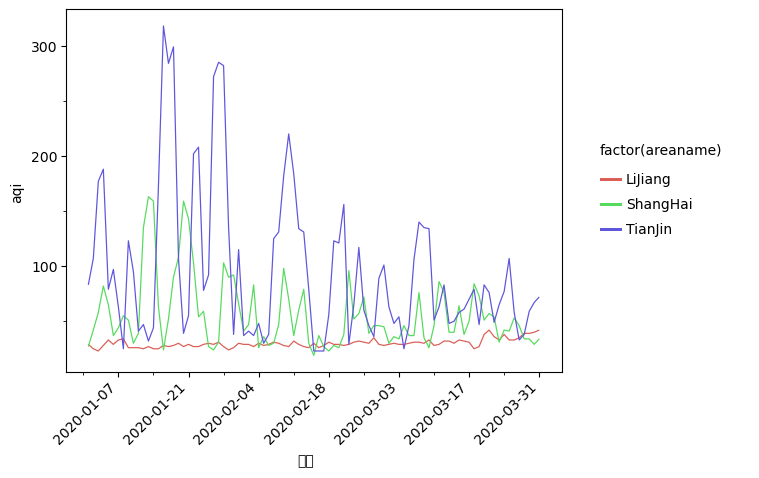

<ggplot: (8764703000417)>

In [26]:
(ggplot(df, aes(x='time', y='aqi', color='factor(areaname)')) + geom_line() +
 scale_x_datetime(breaks=date_breaks('2 weeks')) +
 xlab('日期') +
 theme_matplotlib() +
 theme(axis_text_x=element_text(rotation=45, hjust=1)) +
 theme(text=element_text(family='Bold'))
 )


In [13]:
#areacode = {'410100','310000','110000'}

In [14]:
#month = ['202001','202002','202103']

In [15]:
#url = 'https://ali-weather.showapi.com/weatherhistory'

In [16]:
#payload = {'areaCode':areacode, 'month':month}

In [17]:
#headers = {'Authorization': 'APPCODE ' + appcode}

In [18]:
#res = requests.get(url, params = payload, headers = headers)

In [19]:
#res

In [20]:
#res.content

In [21]:
#content_json = json.loads(res.content)

In [22]:
#content_json

In [23]:
#content_json['showapi_res_body']['list']

In [24]:
#data = pd.DataFrame(content_json['showapi_res_body']['list'])

In [25]:
#data.shape